In [3]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Sampling

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [4]:
# Read the data in using the Table.read_table() method
top = Table.read_table('top_movies_2017.csv')
# Create a row index column and make it the first column of the data set
top = top.with_column('Row Index', np.arange(top.num_rows)).move_to_start('Row Index')
# Format Gross and Gross(Adjusted) as a number format
top.set_format(['Gross', 'Gross (Adjusted)'], NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [5]:
top.take([3, 5, 7])     # Deterministic sample

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965


In [6]:
top.where('Title', are.containing('and the'))    # Deterministic sample

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937
35,Butch Cassidy and the Sundance Kid,Fox,"102,308,889","627,259,300",1969
70,Smokey and the Bandit,Universal,"126,737,428","505,244,700",1977
71,Beauty and the Beast (2017),Buena Vista,"504,014,165","504,014,165",2017
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,"317,575,550","497,066,400",2001
75,Lady and the Tramp,Disney,"93,602,326","495,483,100",1955
91,Indiana Jones and the Temple of Doom,Paramount,"179,870,271","475,906,700",1984
105,Indiana Jones and the Last Crusade,Paramount,"197,171,806","439,312,600",1989
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,"381,011,219","426,630,300",2011
129,Beauty and the Beast,Buena Vista,"218,967,620","403,283,400",1991


In [8]:
start = np.random.choice(np.arange(10))        # Random sampling
top.take(np.arange(start, start + 5))        

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973


In [10]:
top.sample(5)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
49,Bambi,RKO,"102,247,150","566,403,700",1942
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
18,The Lion King,Buena Vista,"422,783,777","792,511,700",1994
52,The Bells of St. Mary's,RKO,"21,333,333","557,803,900",1945
69,Tootsie,Columbia,"177,200,000","505,876,000",1982


In [11]:
top.sample(50).group("Title")

Title,count
2001: A Space Odyssey,1
Airport,1
Aladdin,1
American Graffiti,1
Armageddon,1
Back to the Future,1
Beauty and the Beast (2017),1
Beverly Hills Cop,1
Beverly Hills Cop II,1
Blazing Saddles,1


In [12]:
top.sample(500).group('Title')

Title,count
101 Dalmatians,2
2001: A Space Odyssey,3
9 to 5,4
Airport,5
Aladdin,1
Alice in Wonderland (2010),1
American Graffiti,2
American Sniper,2
An Officer and a Gentleman,2
Apollo 13,4


In [14]:
top.sample(5, with_replacement=False)       # Take a sample of size 5 w/o replacement

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
118,Despicable Me 2,Universal,"368,061,265","416,888,500",2013
152,Psycho,Universal,"32,000,000","379,306,800",1960
47,Pirates of the Caribbean: Dead Man's Chest,Buena Vista,"423,315,812","574,546,200",2006
127,Peter Pan,Disney,"87,404,651","405,593,100",1953
164,The Jungle Book (2016),Buena Vista,"364,001,123","370,808,400",2016


## Dice

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [16]:
die = Table().with_column('face', np.arange(1, 7))
die

face
1
2
3
4
5
6


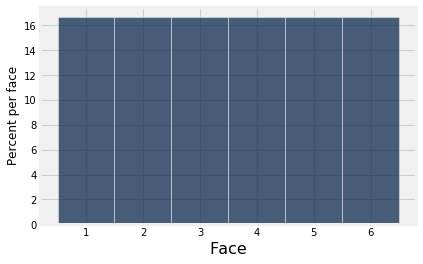

In [17]:
def face_hist(t):
    t.hist('face', bins=np.arange(0.5, 7, 1), unit='face')
    plots.xlabel('Face')

face_hist(die)

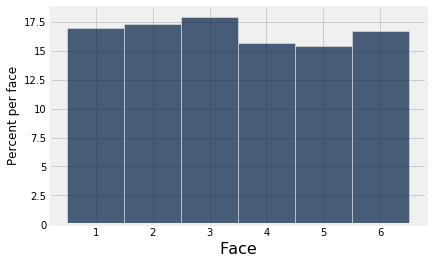

In [18]:
# Try changing the sample size of 1000 to larger and smaller numbers
face_hist(die.sample(1000))

## Large Random Samples

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [20]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


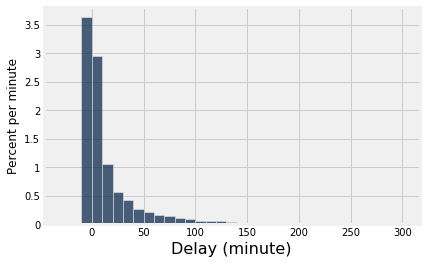

In [24]:
def delay_hist(t):
    t.hist('Delay', unit='minute', bins=np.arange(-30, 301, 10))
    
# All the flights by united
delay_hist(united)

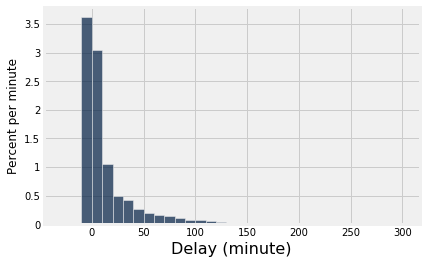

In [26]:
# Pick a sample of 1000 flights off united airlines
delay_hist(united.sample(10000))

## Simulation

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [33]:
# Rolling a fair die 4 times, what is the probability of getting at least one 6? The probability of getting no 6 is 5/6.
k = 4
round(1 - (5/6) ** 4, 3)   # (Theoretical)

0.518

In [29]:
dice = np.arange(6) + 1
rolls = np.random.choice(dice, k)
rolls

array([6, 6, 1, 2])

In [30]:
sum(rolls == 6)

2

In [42]:
trials = 10000
successes = 0

for i in np.arange(trials):
    # Roll the die 4 times, and record the number of getting at lesat one 6
    rolls = np.random.choice(dice, k)
    if sum(rolls == 6) > 0:
        successes += 1
        
successes / trials

0.5198

## Statistics

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [49]:
def estimate_by_simulation(trials):
    successes = 0

    for _ in np.arange(trials):
        rolls = np.random.choice(dice, k)
        if sum(rolls == 6) > 0:
            successes = successes + 1

    return successes / trials

estimates = []
for _ in np.arange(1000):
    estimates.append(estimate_by_simulation(10000))

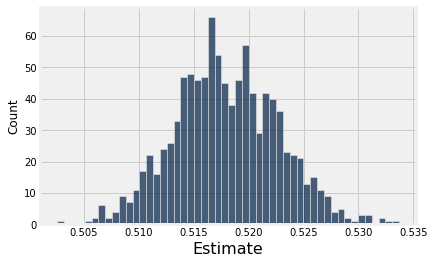

In [50]:
Table().with_column('Estimate', estimates).hist(bins=50, normed=False)